<a href="https://colab.research.google.com/github/dmswl0707/CoronaCoprosperityCard_DataScience/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#######데이터 불러오기
######텍스트 마이닝 - word2vec
######클러스터 갯수 설정(엘보우)
######군집분석

##개념 한번씩 찾아보세요

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import openpyxl
from sklearn.datasets import make_blobs

#####데이터 불러오기

file_dir1 ='/content/drive/My Drive/Colab Notebooks/data/revised_data/twenty_store.xlsx'
file_dir2 ='/content/drive/My Drive/Colab Notebooks/data/revised_data/thirty_store.xlsx'
file_dir3 ='/content/drive/My Drive/Colab Notebooks/data/revised_data/forty_store.xlsx'
file_dir4 ='/content/drive/My Drive/Colab Notebooks/data/revised_data/fifty_store.xlsx'

from google.colab import drive
drive.mount('/content/drive') #구글 드라이브에 접근
twenty_store = pd.read_excel(file_dir1, sheet_name = 'Sheet1')
thirty_store = pd.read_excel(file_dir2, sheet_name = 'Sheet1')
forty_store = pd.read_excel(file_dir3, sheet_name = 'Sheet1')
fifty_store = pd.read_excel(file_dir4, sheet_name = 'Sheet1')

#인덱스 재설정, '업종' 출력
twenty_store.columns=['num','연도','상권','업종','값']
twenty_store=twenty_store['업종']
print(twenty_store)

thirty_store.columns=['num','연도','상권','업종','값']
thirty_store=thirty_store['업종']
print(twenty_store)

forty_store.columns=['num','연도','상권','업종','값']
forty_store=forty_store['업종']
print(twenty_store)

fifty_store.columns=['num','연도','상권','업종','값']
fifty_store=fifty_store['업종']
print(twenty_store)

Mounted at /content/drive
0           커피-음료
1             편의점
2            일반의류
3             편의점
4           커피-음료
          ...    
195         커피-음료
196    컴퓨터및주변장치판매
197          일반의류
198          슈퍼마켓
199         한식음식점
Name: 업종, Length: 200, dtype: object
0           커피-음료
1             편의점
2            일반의류
3             편의점
4           커피-음료
          ...    
195         커피-음료
196    컴퓨터및주변장치판매
197          일반의류
198          슈퍼마켓
199         한식음식점
Name: 업종, Length: 200, dtype: object
0           커피-음료
1             편의점
2            일반의류
3             편의점
4           커피-음료
          ...    
195         커피-음료
196    컴퓨터및주변장치판매
197          일반의류
198          슈퍼마켓
199         한식음식점
Name: 업종, Length: 200, dtype: object
0           커피-음료
1             편의점
2            일반의류
3             편의점
4           커피-음료
          ...    
195         커피-음료
196    컴퓨터및주변장치판매
197          일반의류
198          슈퍼마켓
199         한식음식점
Name: 업종, Length: 200, dtype: object


In [20]:
####word2vec

from gensim.models import Word2Vec
import matplotlib.pyplot as plt

def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8,6))
    plt.scatter(xs, ys, marker='o')
    for i,v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i],ys[i]))


A=twenty_store.tolist()
B=thirty_store.tolist()
C=forty_store.tolist()
D=fifty_store.tolist()

store_list=A+B+C+D
sentence = []
for v in store_list:
    if v not in sentence:
        sentence.append(v)
print(sentence,'/t')

#모델 구성
model=Word2Vec(sentence, size=300, window=3, min_count=1, workers=1)

#단어 벡터를 구한다
Word_vectors=model.wv

vocabs=Word_vectors.vocab.keys()
Word_vectors_list=[Word_vectors[v] for v in vocabs]
print(Word_vectors_list)

#결과 1 : 단어간 유사도 확인 
print(Word_vectors.similarity(w1='일반의류',w2='편의점'))

from sklearn.decomposition import PCA
pca = PCA()
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

#결과 2 : 단어간 유사도 확인 
plot_2d_praph(vocab,xs,ys)

file_name=''
model.intersect_word3vec_format(fname=file_name,binary=True)

# 최종 모델을 저장
model.save('word2vec.model')
model=word2vec.load('word2vec.model')



['커피-음료', '편의점', '일반의류', '전자상거래업', '제과점', '컴퓨터및주변장치판매', 'PC방', '반찬가게', '한식음식점', '수산물판매', '호프-간이주점', '슈퍼마켓', '일반의원', '의료기기', '가전제품', '화장품', '시계및귀금속', '양식음식점', '신발', '의약품', '문구', '육류판매', '청과상', '조명용품', '운동/경기용품', '핸드폰', '일반교습학원', '외국어학원', '가구', '섬유제품'] /t
[array([-1.65602495e-03,  1.00837776e-03, -1.04928404e-04, -3.53393785e-04,
       -1.02636684e-03,  7.81481620e-04, -1.01163122e-03, -9.52457951e-04,
        1.60550349e-03, -2.37029788e-04, -1.00187236e-03,  8.20837973e-04,
        7.36688671e-04,  1.02137405e-04, -1.29381462e-03, -1.63070520e-03,
       -2.02793708e-05,  5.23997121e-04, -1.37326680e-03,  6.54490374e-04,
       -8.90064752e-04, -5.28874807e-04,  1.14764366e-03, -5.82581852e-05,
        7.11148838e-04, -5.87696559e-04, -1.10256055e-03,  6.11597963e-04,
        9.89062130e-04,  1.17761421e-03,  8.10007215e-04,  1.41228270e-03,
       -1.08799909e-03, -1.55704375e-03, -5.62998466e-04,  1.55071635e-03,
        1.47407452e-04, -2.02361203e-04,  1.35762792e-03,  1.62829994e

KeyError: ignored

In [ ]:
#####엘보우

def elbow(X):
    sse=[]
    for i in range(1, 11):
        km=KMeans(n_clusters=i, init='K-means++', random_state=0)
        km.fit(X)
        sse.append(km.intertia_)

    plt.plot(range(1,11),sse, marker='o')
    plt.xlabel('클러스터 갯수')
    plt.ylabel('SSE')
    plt.show()

elbow(X)

NameError: ignored

findfont: Font family ['Gothic'] not found. Falling back to DejaVu Sans.


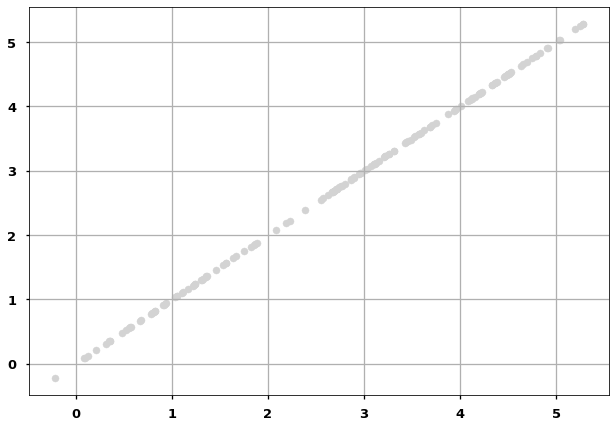

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49900 missing from current font.
  font.set_

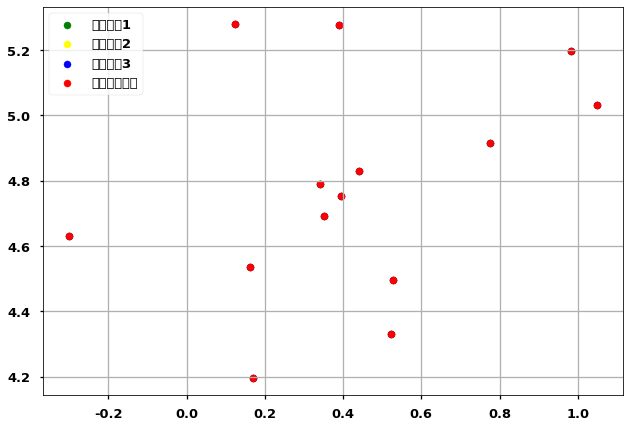

In [ ]:
####클러스터링

style.use('seaborn-talk')
krfont={'family' : 'Gothic', 'weight' : 'bold','size' : 10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus']=False

x, y =make_blobs(n_samples=150, n_features=2 , centers=3, cluster_std=0.5,
                 shuffle = True, random_state = 0)

plt.scatter(x[:,1], x[:,1], c='lightgray', marker='o', s=50)
plt.grid(True)
plt.show()

from sklearn.cluster import KMeans

init_centroid='random'

km=KMeans(n_clusters=5, init=init_centroid, random_state=0)
y_km=km.fit_predict(x)

plt.scatter(x[y_km==0,0],x[y_km==0,1], c='green', marker='o',
            s=50, label='클러스터1')
plt.scatter(x[y_km==0,0],x[y_km==0,1], c='yellow', marker='o',
            s=50, label='클러스터2')
plt.scatter(x[y_km==0,0],x[y_km==0,1], c='blue', marker='o',
            s=50, label='클러스터3')
plt.scatter(x[y_km==0,0],x[y_km==0,1], c='red', marker='o',
            s=50, label='클러스터중심')

plt.legend()
plt.grid(True)
plt.show()



